In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
url ='https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/Social_Network_Ads.csv'
df = pd.read_csv(url)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [30]:
X = df.drop(columns=['User ID', 'Purchased'])
y = df['Purchased']

In [31]:
cat_cols = X.select_dtypes(exclude='number').columns.tolist()
num_cols = X.select_dtypes(include='number').columns.tolist()
print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')

Categorical columns: ['Gender']
Numerical columns: ['Age', 'EstimatedSalary']


In [32]:
cat_pipe = Pipeline([
    ('ordinal', OrdinalEncoder())
])
num_pipe = Pipeline([
    ('scale', StandardScaler())
])

col_transform = ColumnTransformer([
    ('categorical', cat_pipe, cat_cols),
    ('numerical', num_pipe, num_cols)
]) 

# logistic regression
lr_pipe = Pipeline([
    ('transform', col_transform),
    ('model', LogisticRegression())
])

# knn
knn_pipe = Pipeline([
    ('transform', col_transform),
    ('model', KNeighborsClassifier())
])

# svm
svm_pipe = Pipeline([
    ('transform', col_transform),
    ('model', SVC())
])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr_pipe.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train)
svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Gender']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'EstimatedSalary'])])),
                ('model', SVC())])

In [56]:
import seaborn as sns

def plot_confusion_matrix(xtest, ytest, model):
    ypred = model.predict(xtest)
    cm = confusion_matrix(ytest, ypred)
    fig, ax = plt.subplots(figsize=(2,2))
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cbar=False)

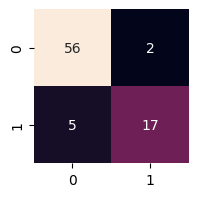

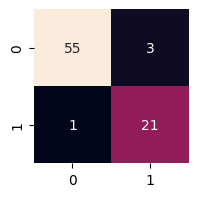

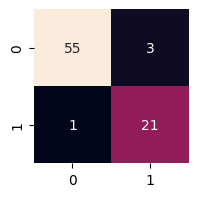

In [57]:
plot_confusion_matrix(X_test, y_test, lr_pipe)
plot_confusion_matrix(X_test, y_test, knn_pipe)
plot_confusion_matrix(X_test, y_test, svm_pipe)

In [59]:
# precision, recall, f1-score
ypred_1 = lr_pipe.predict(X_test)
print(f'Precision= {precision_score(y_test, ypred_1)}')
print(f'Recall= {recall_score(y_test, ypred_1)}') 
print(f'F1-score= {f1_score(y_test, ypred_1)}')

Precision= 0.8947368421052632
Recall= 0.7727272727272727
F1-score= 0.8292682926829269


In [60]:
ypred_2 = knn_pipe.predict(X_test)
print(f'Precision= {precision_score(y_test, ypred_2)}')
print(f'Recall= {recall_score(y_test, ypred_2)}')
print(f'F1-score= {f1_score(y_test, ypred_2)}')

Precision= 0.875
Recall= 0.9545454545454546
F1-score= 0.9130434782608695


In [61]:
ypred_3 = svm_pipe.predict(X_test)
print(classification_report(y_test, ypred_3))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [62]:
ypred_1 = lr_pipe.predict(X_test)
print(classification_report(y_test, ypred_1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



In [63]:
ypred_2 = svm_pipe.predict(X_test)
print(classification_report(y_test, ypred_2))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [64]:
# visualize distribution of classes in dataset

# make classification on diabetes dataset

to be covered
- visualizing classification
- class imbalance problem
- column selection